In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

In [2]:
(x_trn, y_trn), (x_tst, y_tst) = mnist.load_data()

In [3]:
num_features = 28 * 28
n_classes = 10

In [4]:
x_train = np.array(x_trn, np.float32)/255
x_test = np.array(x_tst, np.float32)/255

x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

y_train = keras.utils.to_categorical(y_trn, 10)
y_test = keras.utils.to_categorical(y_tst, 10)

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2), strides = 2),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2, 2), strides = 2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [7]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_split = 0.2, verbose = 1)
model.evaluate(x_test, y_test)

Epoch 1/5
1500/1500 [==============================] - 67s 43ms/step - loss: 0.1451 - accuracy: 0.9553 - val_loss: 0.0776 - val_accuracy: 0.9752
Epoch 2/5
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0857 - accuracy: 0.9751 - val_loss: 0.1133 - val_accuracy: 0.9743
Epoch 3/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0736 - accuracy: 0.9790 - val_loss: 0.0778 - val_accuracy: 0.9779
Epoch 4/5
1500/1500 [==============================] - 64s 43ms/step - loss: 0.0672 - accuracy: 0.9818 - val_loss: 0.1066 - val_accuracy: 0.9790
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0826 - accuracy: 0.9790


[0.0826234221458435, 0.9789999723434448]

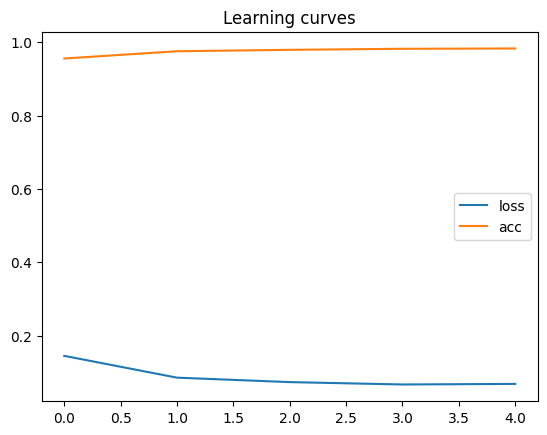

In [8]:
plt.title('Learning curves')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'acc')
plt.legend()
plt.show()

1/1 [==============================] - 0s 259ms/step


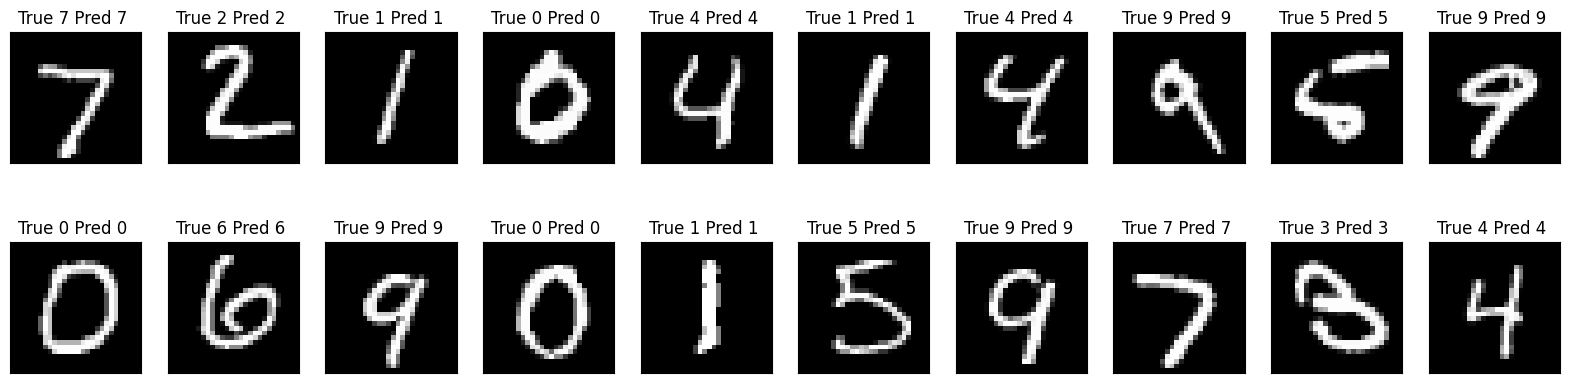

In [9]:
def show_data_labels(x, y_true, y_pred, num_img = 20, rows = 2):  
    fig = plt.figure(figsize = (20, 5))
    for i in np.arange(num_img):
        ax = fig.add_subplot(2, num_img // rows, i + 1, xticks = [], yticks = [])
        plt.imshow(np.reshape(x[i], [28, 28]), cmap = 'gray', interpolation = 'none')
        ax.set_title('True {0} Pred {1} '.format(np.argmax(y_true[i]), np.argmax(y_pred[i])))

n_img = 20
rows = 2
test_img = x_test[:n_img]
test_y = y_test[:n_img]
pred_y = model.predict(test_img)
show_data_labels(test_img, test_y, pred_y, n_img, rows)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [11]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 2.09690422e-01, -1.37639296e+00,  4.44598317e-01,
           -3.76249194e-01, -8.73558939e-01, -1.88806999e+00,
           -2.64979333e-01, -2.94494003e-01, -1.64391220e-01,
           -2.49465510e-01, -1.68716848e-01, -1.35070652e-01,
           -4.59037393e-01, -2.60136992e-01, -1.12823360e-01,
           -2.33071089e-01, -3.62625182e-01, -5.96426725e-02,
           -6.97840989e-01, -1.77619547e-01, -2.62988135e-02,
           -2.86262240e-02, -3.81541133e-01,  2.35790253e-01,
            5.88328242e-01, -5.27564017e-03, -2.71197379e-01,
           -2.08969507e-02,  1.05053164e-01, -5.42198867e-02,
           -5.33336282e-01, -2.48591378e-01]],
 
         [[-5.76930642e-02, -5.35531282e-01, -1.96905397e-02,
           -1.08924933e-01, -1.41578987e-01, -1.01414673e-01,
            8.78337305e-03, -2.74201721e-01, -1.56397894e-01,
           -3.13745618e-01, -7.53555596e-01, -1.96362346e-01,
         

In [12]:
model.layers[0].weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 2.09690422e-01, -1.37639296e+00,  4.44598317e-01,
           -3.76249194e-01, -8.73558939e-01, -1.88806999e+00,
           -2.64979333e-01, -2.94494003e-01, -1.64391220e-01,
           -2.49465510e-01, -1.68716848e-01, -1.35070652e-01,
           -4.59037393e-01, -2.60136992e-01, -1.12823360e-01,
           -2.33071089e-01, -3.62625182e-01, -5.96426725e-02,
           -6.97840989e-01, -1.77619547e-01, -2.62988135e-02,
           -2.86262240e-02, -3.81541133e-01,  2.35790253e-01,
            5.88328242e-01, -5.27564017e-03, -2.71197379e-01,
           -2.08969507e-02,  1.05053164e-01, -5.42198867e-02,
           -5.33336282e-01, -2.48591378e-01]],
 
         [[-5.76930642e-02, -5.35531282e-01, -1.96905397e-02,
           -1.08924933e-01, -1.41578987e-01, -1.01414673e-01,
            8.78337305e-03, -2.74201721e-01, -1.56397894e-01,
           -3.13745618e-01, -7.53555596e-01, -1.96362346e-01,
         

In [13]:
def get_layer_output(model, layer_indx, x):
    layer = model.layers[layer_indx]
    model_full = keras.Model(inputs = model.inputs, outputs = layer.output)
    output_layer = model_full.predict(x)
    return output_layer[0, :, :, :]

In [18]:
layer1_output = [get_layer_output(model, 0, x_test[1:2])[:, :, i] for i in range(32)]
layer2_output = [get_layer_output(model, 2, x_test[1:2])[:, :, i] for i in range(64)]

1/1 [==============================] - 0s 106ms/step


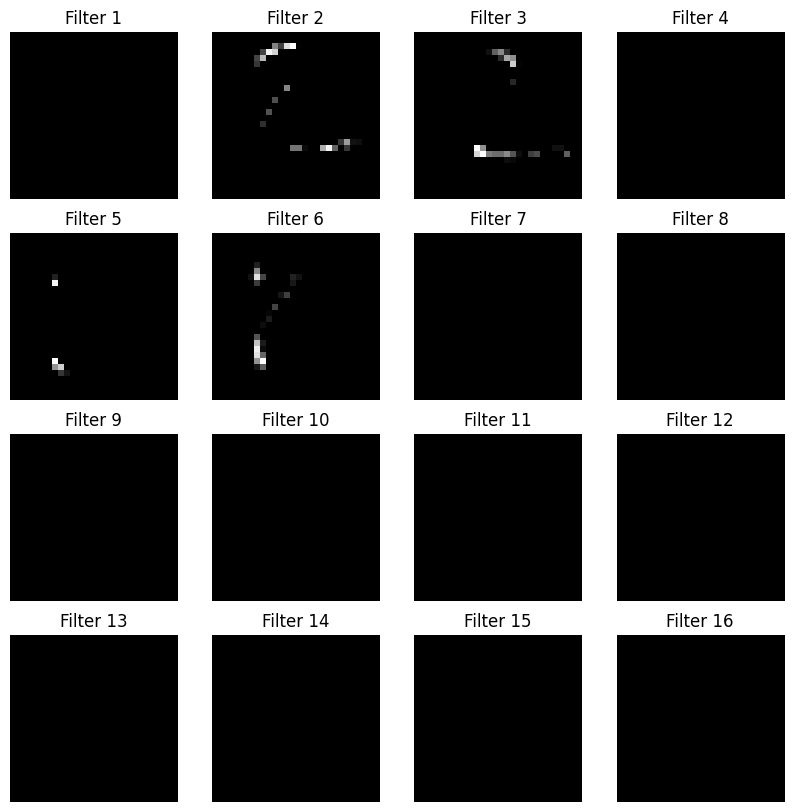

In [19]:
fig, axs = plt.subplots(4, 4, figsize = (10, 10))
for i in range(16):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(layer1_output[i], cmap = 'gray')
    axs[row, col].axis('off')
    axs[row, col].set_title('Filter {0}'.format(i + 1))

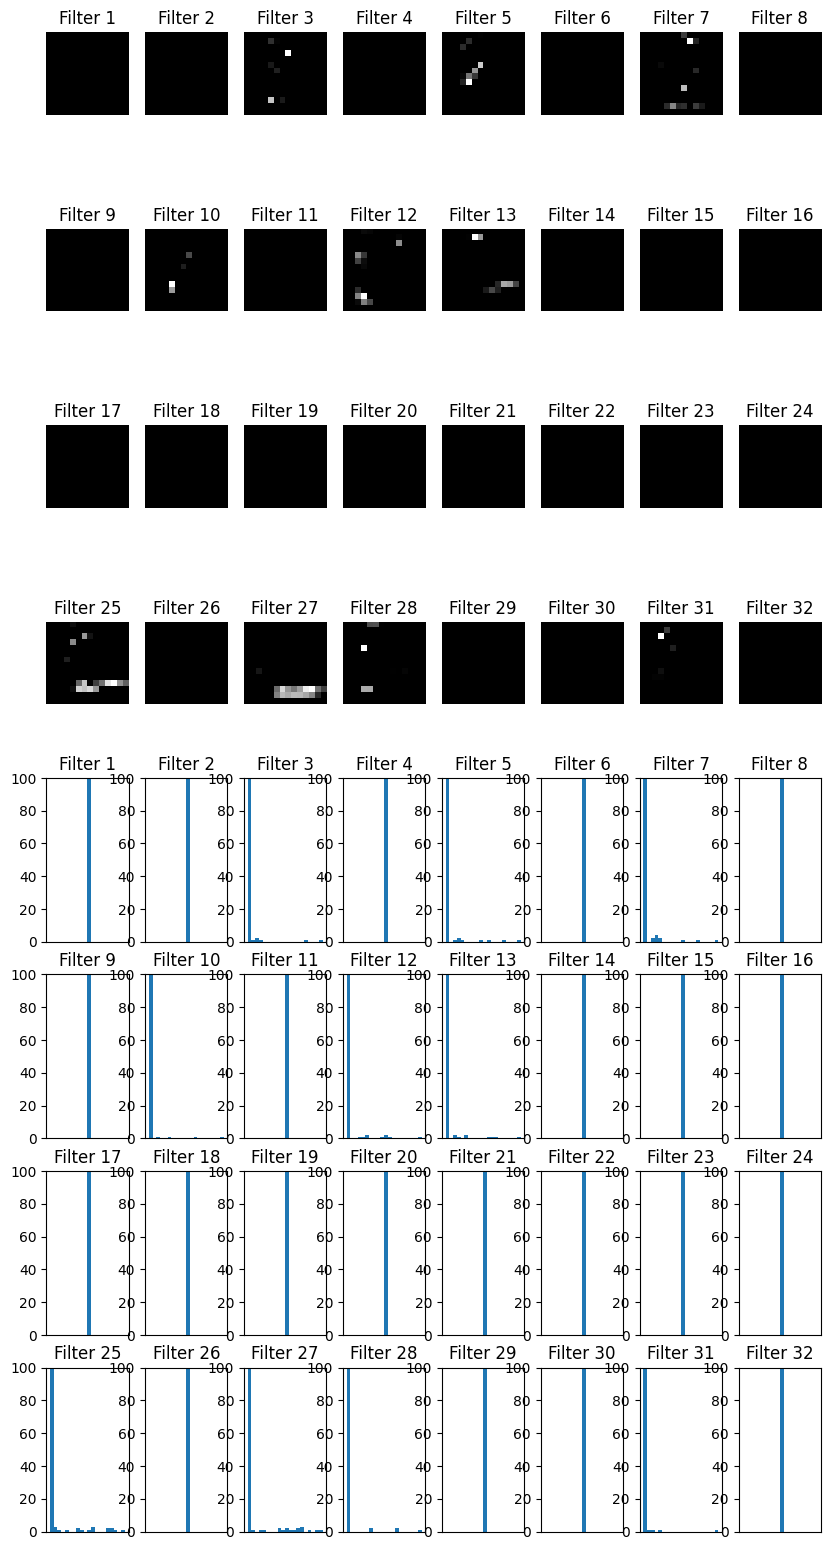

In [20]:
fig, axs = plt.subplots(8, 8, figsize = (10, 20))
for i in range(32):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(layer2_output[i], cmap = 'gray')
    axs[row, col].axis('off')
    axs[row, col].set_title('Filter {0}'.format(i + 1))
    axs[row + 4, col].hist(layer2_output[i].flatten(), bins = 20)
    axs[row + 4, col].set_ylim([0, 100])
    axs[row + 4, col].set_title('Filter {0}'.format(i + 1))
    axs[row + 4, col].set_xticks([])